In [1]:
import numpy as np
from scipy import signal
from custome_ica import ica,plot_mixture_sources_predictions
from ica import icax
import mne
def info_max_ica(signals):
    _, S_pred = icax(signals.T,signals.shape[1],verbose=True)
    return S_pred.T
from sklearn.decomposition import FastICA
from PlotUtility import plot_multi_channel
from dimension_magic import find_time_delay_MI,time_delay_embed
import matplotlib.pyplot as plt 
n_samples = 20000000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  +np.random.rand(n_samples)# sinusoidal
s2 = np.sign(np.sin(3 * time)) +np.random.rand(n_samples) # square signal
s3 = signal.sawtooth(2 * np.pi * time) +np.random.rand(n_samples) # saw tooth signal

In [2]:
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)
single_channel = X[:,0]

In [3]:
mis = find_time_delay_MI(single_channel,ndelay=800,tau = 100)
plt.plot(mis)

MemoryError: Unable to allocate 119. GiB for an array with shape (800, 19920001) and data type float64

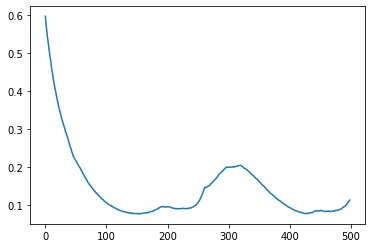

In [22]:
plt.plot(mis)

In [34]:
embedding = time_delay_embed(single_channel,ndelay = 10,tau = 400)

In [35]:
transformer = FastICA(random_state=0)
signals_transformed = transformer.fit_transform(embedding.T)

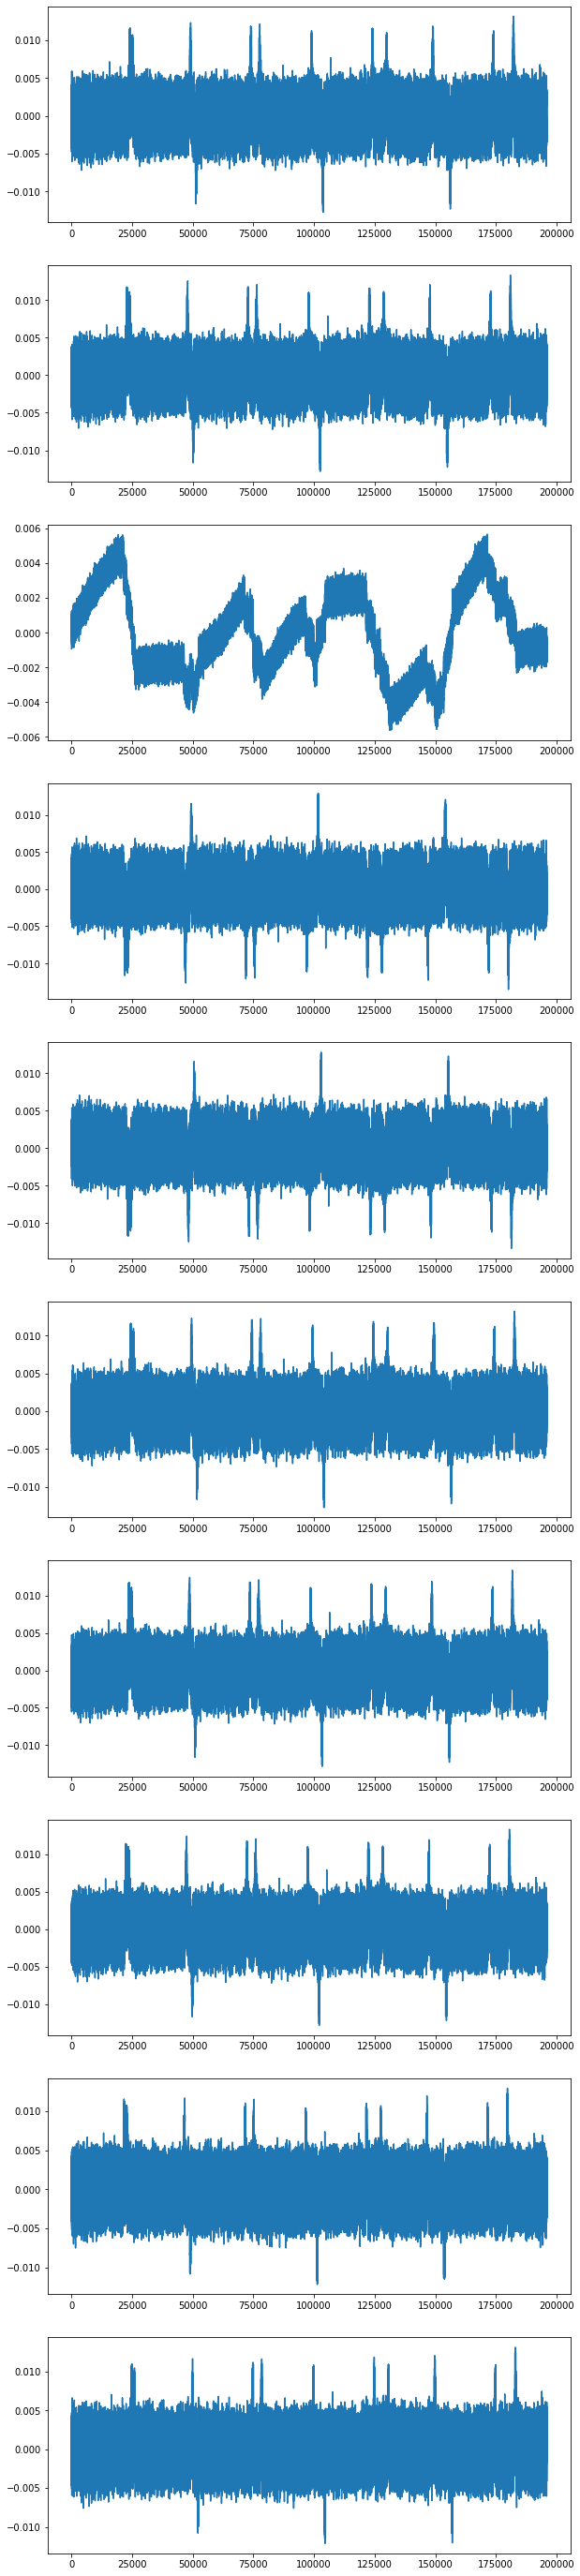

In [37]:
plot_multi_channel(signals_transformed)